# MATH 210 Introduction to Mathematical Computing

**March 5, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simpson's Rule

Find $N$ which guarantees $E_N^S(f) < 0.01$ for $\int_0^1 e^{-x^2} dx$.

In [7]:
f = lambda x: np.exp(-x**2)
d4f = lambda x: np.exp(-x**2)*(12 - 48*x**2 + 16*x**4)

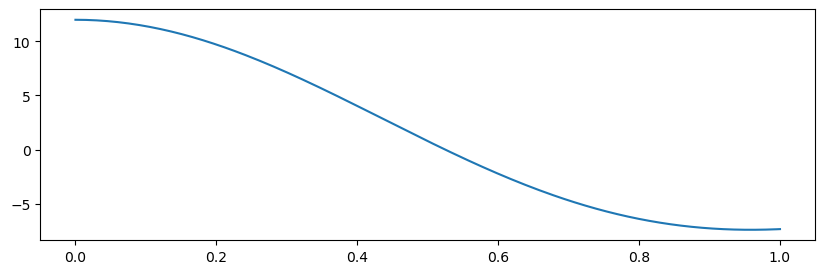

In [8]:
x = np.linspace(0,1,200)
plt.figure(figsize=(10,3))
plt.plot(x,d4f(x))
plt.show()

We see that $|f''''(x)| \leq 12$ for $x \in [0,1]$.

In [9]:
N = (12/180/0.01)**0.25
N

1.6068568378893033

Choose $N=2$ and compute:

In [10]:
a = 0
b = 1
N = 2
dx = (b - a)/N
SN = dx/3*(f(a) + 4*f((a + b)/2) + f(b))
SN

0.7471804289095104

Equivalent to the following:

In [11]:
1/6*(1 + 4*np.exp(-1/4) + np.exp(-1))

0.7471804289095104

Try error less than $10^{-6}$.

In [12]:
N = (12/180/1e-6)**0.25
N

16.068568378893033

Use the SciPy function for Simpson's rule.

In [13]:
import scipy.integrate as spi

For $N=2$:

In [18]:
a = 0
b = 1
N = 2
dx = (b - a)/N
x = np.linspace(a,b,N+1)
y = f(x)
SN = spi.simpson(y,x=x)
SN

0.7471804289095104

Same as above. Now try $N = 18$:

In [19]:
N = 18
dx = (b - a)/N
x = np.linspace(a,b,N+1)
y = f(x)
SN = spi.simpson(y,x=x)
SN

0.7468242106299984

The function `scipy.integrate.quad` approximates the integral using Gaussian quadrature. The function returns the approximation and an bound on the error.

In [20]:
I,err = spi.quad(f,a,b)

In [21]:
I

0.7468241328124271

In [22]:
err

8.291413475940725e-15